In [18]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from IPython.display import Image

In [19]:
# define State

class BMIState(TypedDict):

    weight_kg : float 
    height_m : float
    bmi : float
    category : str

In [20]:
def calculate_bmi(state : BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight/(height**2)

    state['bmi'] = round(bmi, 2)

    return state


In [21]:
def categorize_bmi(state : BMIState) -> BMIState:
    bmi = state['bmi']

    if bmi < 18.5:
        category = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        category = 'Normal weight'
    elif 25 <= bmi < 29.9:
        category = 'Overweight'
    else:
        category = 'Obesity'

    state['category'] = category

    return state

In [22]:
# define your graph

graph = StateGraph(BMIState)

# add nodes to your graph 
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("categorize_bmi", categorize_bmi)

# add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'categorize_bmi')
graph.add_edge('calculate_bmi', END)

# complete the graph
workflow = graph.compile()

In [28]:
# execute the graph
initial_state = {'weight_kg': 73, 'height_m': 1.79}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight_kg': 73, 'height_m': 1.79, 'bmi': 22.78, 'category': 'Normal weight'}


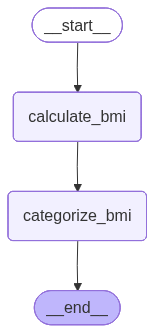

In [24]:
Image(workflow.get_graph().draw_mermaid_png())